Question 2 Part A

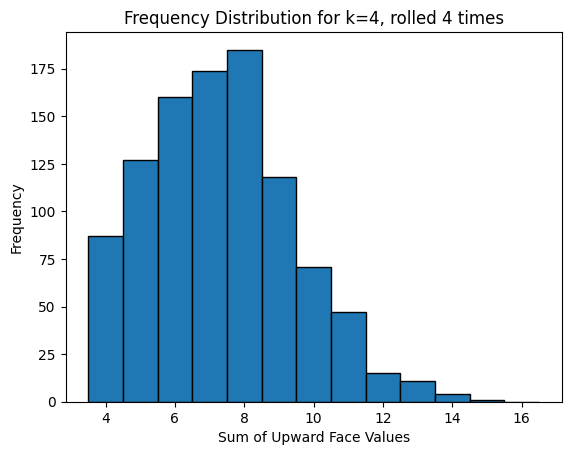

Five-number summary for Task 1: [ 4.  6.  7.  9. 15.]


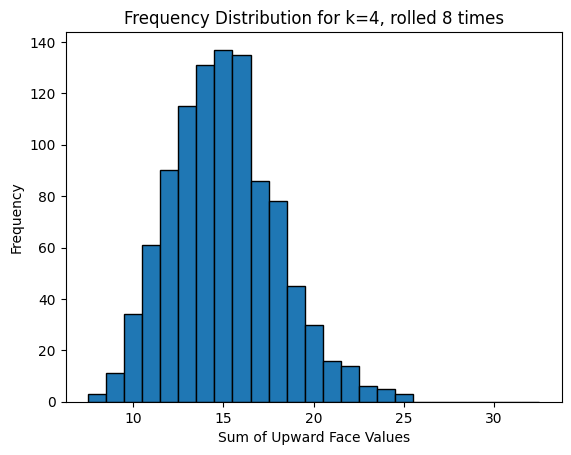

Five-number summary for Task 2: [ 8. 13. 15. 17. 25.]


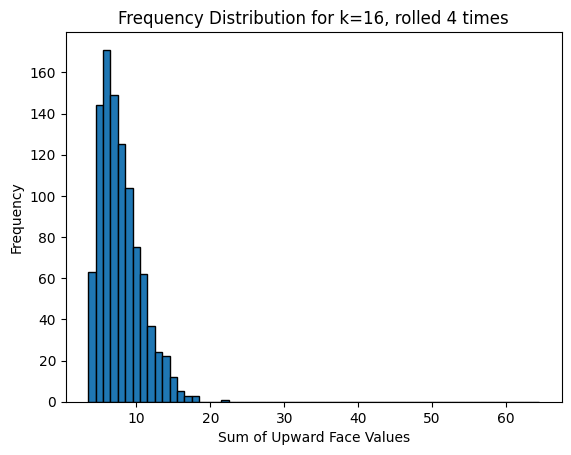

Five-number summary for Task 3: [ 4.  6.  7.  9. 22.]


In [94]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

def roll_die(k, times):
    # Define the probabilities for the k-faced die
    probabilities = [1/(2**(i-1)) for i in range(2, k)] + [1/(2**(k-1)), 1/(2**(k-1))]

    # Ensure the probabilities sum up to 1
    assert abs(sum(probabilities) - 1) < 1e-9, "Probabilities do not sum up to 1!"

    # Simulate rolling the die
    rolls = np.random.choice(range(1, k+1), size=times, p=probabilities)
    return rolls

def simulate_rolls(k, roll_times, repeat_times):
    sums = []
    for _ in range(repeat_times):
        rolls = roll_die(k, roll_times)
        sums.append(rolls.sum())
    return sums

# Task 1
k = 4
roll_times = 4
repeat_times = 1000
sums_1 = simulate_rolls(k, roll_times, repeat_times)

plt.hist(sums_1, bins=range(roll_times, roll_times*k+2), edgecolor='black', align='left')
plt.title(f"Frequency Distribution for k={k}, rolled {roll_times} times")
plt.xlabel("Sum of Upward Face Values")
plt.ylabel("Frequency")
plt.show()

print("Five-number summary for Task 1:", np.percentile(sums_1, [0, 25, 50, 75, 100]))

# Task 2
roll_times = 8
sums_2 = simulate_rolls(k, roll_times, repeat_times)

plt.hist(sums_2, bins=range(roll_times, roll_times*k+2), edgecolor='black', align='left')
plt.title(f"Frequency Distribution for k={k}, rolled {roll_times} times")
plt.xlabel("Sum of Upward Face Values")
plt.ylabel("Frequency")
plt.show()

print("Five-number summary for Task 2:", np.percentile(sums_2, [0, 25, 50, 75, 100]))

# Task 3
k = 16
roll_times = 4
sums_3 = simulate_rolls(k, roll_times, repeat_times)

plt.hist(sums_3, bins=range(roll_times, roll_times*k+2), edgecolor='black', align='left')
plt.title(f"Frequency Distribution for k={k}, rolled {roll_times} times")
plt.xlabel("Sum of Upward Face Values")
plt.ylabel("Frequency")
plt.show()

print("Five-number summary for Task 3:", np.percentile(sums_3, [0, 25, 50, 75, 100]))


Part B

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [96]:
%pip install ucimlrepo

In [97]:
from ucimlrepo import fetch_ucirepo

In [98]:
# 1. Data
spambase = fetch_ucirepo(id=94)

In [99]:
# data (as pandas dataframes)
X = spambase.data.features
y = spambase.data.targets

In [100]:
# 2. Loading Dataset
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

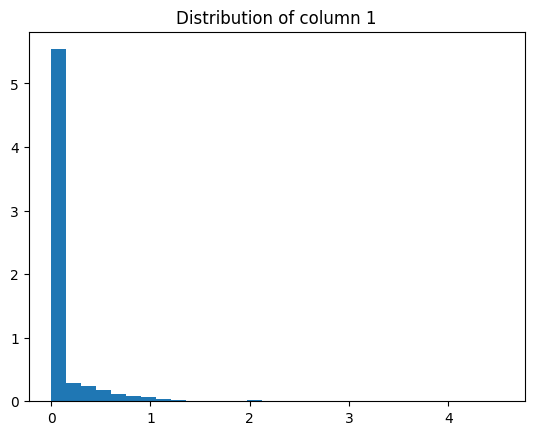

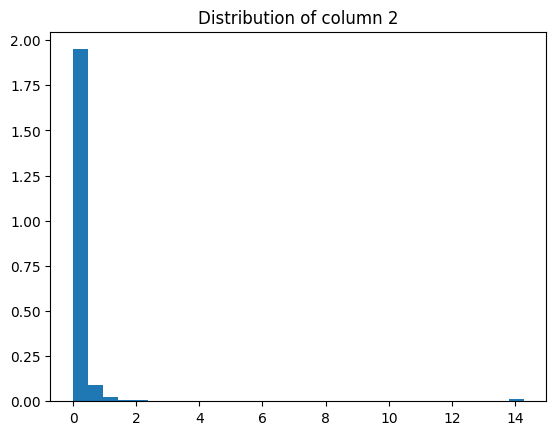

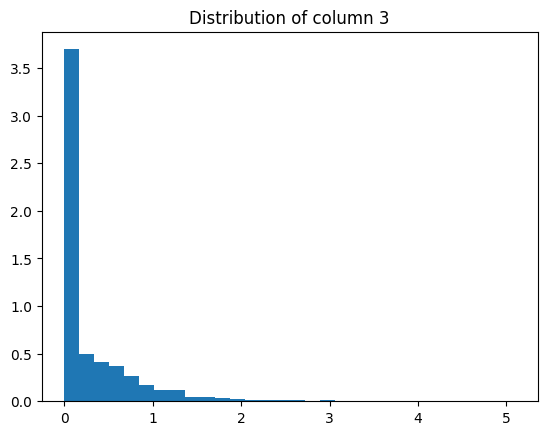

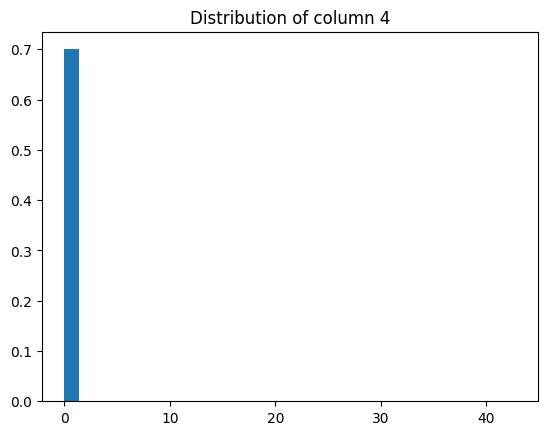

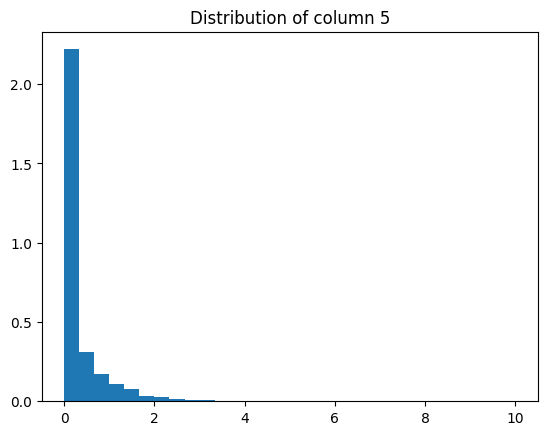

In [101]:
# 3. Plot Distribution
# Choosing the first 5 columns for demonstration
for i in range(5):
    plt.hist(X_train.iloc[:, i], bins=30, density=True)
    plt.title(f"Distribution of column {i+1}")
    plt.show()

In [102]:
# 4. Priors
class_priors = [np.mean(y_train == c) for c in np.unique(y_train)]
print("Class Priors:", class_priors)

Class Priors: [Class    0.616149
dtype: float64, Class    0.383851
dtype: float64]


In [103]:
# 5 & 6
class NaiveBayes:
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.parameters = {}
        for c in self.classes:
            X_c = X[y == c]
            self.parameters[c] = {
                'mean': X_c.mean(axis=0),
                'var': X_c.var(axis=0),
                'prior': np.mean(y == c)
            }

    def predict(self, X):
        n_samples, n_features = X.shape
        probs = np.zeros((n_samples, len(self.classes)))

        for idx, c in enumerate(self.classes):
            prior_c = float(self.parameters[c]['prior'])
            probs_c = self._pdf(X, self.parameters[c]['mean'], self.parameters[c]['var'])

            total_probs = probs_c.prod(axis=1) * prior_c

            probs[:, idx] = total_probs

        return np.argmax(probs, axis=1)

    def _pdf(self, X, mean, var):
        eps = 1e-4  # Added to avoid division by zero
        coeff = 1.0 / np.sqrt(2.0 * np.pi * var + eps)
        exp = np.exp(-(X - mean) ** 2 / (2 * var + eps))

        # Debugging statements
        # print(f"X shape: {X.shape}")
        # print(f"mean shape: {mean.shape}")
        # print(f"var shape: {var.shape}")
        # print(f"coeff shape: {coeff.shape}")
        # print(f"exp shape: {exp.shape}")

        return coeff * exp

model = NaiveBayes()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.5861070911722142
Precision: 0.2930535455861071
Recall: 0.5
F1 Score: 0.36952554744525545


In [104]:
# 7. Log Transformation
# Find the minimum value across the datasets
min_val = min(X_train.min().min(), X_val.min().min(), X_test.min().min())

# Shift datasets if the minimum value is negative or zero
if min_val <= 0:
    shift = np.abs(min_val) + 1
    X_train += shift
    X_val += shift
    X_test += shift

# Apply log1p transformation
X_train_log = np.log1p(X_train)
X_val_log = np.log1p(X_val)
X_test_log = np.log1p(X_test)


In [105]:
# Train and evaluate on original data
model_original = NaiveBayes()
model_original.fit(X_train, y_train)
y_pred_original = model_original.predict(X_val)
accuracy_original = accuracy_score(y_val, y_pred_original)

# Train and evaluate on log-transformed data
model_log = NaiveBayes()
model_log.fit(X_train_log, y_train)
y_pred_log = model_log.predict(X_val_log)
accuracy_log = accuracy_score(y_val, y_pred_log)

In [106]:
print("Performance on Original Data:")
print(f"Accuracy: {accuracy_original:.4f}")
print("\nPerformance on Log-transformed Data:")
print(f"Accuracy: {accuracy_log:.4f}")

Performance on Original Data:
Accuracy: 0.5783

Performance on Log-transformed Data:
Accuracy: 0.5783


In [69]:
# # 5. Evaluate its performance
# y_pred_log = model.predict(X_test_log)
# accuracy_log = accuracy_score(y_test, y_pred_log)
# precision_log = precision_score(y_test, y_pred_log)
# recall_log = recall_score(y_test, y_pred_log)
# f1_log = f1_score(y_test, y_pred_log)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [70]:
# # 6. Compare the results
# print("Performance on Original Data:")
# print(f"Accuracy: {accuracy}")
# print(f"Precision: {precision}")
# print(f"Recall: {recall}")
# print(f"F1 Score: {f1}")
# print("\nPerformance on Log-transformed Data:")
# print(f"Accuracy: {accuracy_log}")
# print(f"Precision: {precision_log}")
# print(f"Recall: {recall_log}")
# print(f"F1 Score: {f1_log}")

Performance on Original Data:
Accuracy: 0.5861070911722142
Precision: 0.2930535455861071
Recall: 0.5
F1 Score: 0.36952554744525545

Performance on Log-transformed Data:
Accuracy: 0.5861070911722142
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


Part C

In [107]:
#1
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Train GaussianNB on original data
nb_original = GaussianNB()
nb_original.fit(X_train, y_train)
y_pred_val_original = nb_original.predict(X_val)
accuracy_val_original = accuracy_score(y_val, y_pred_val_original)

# Train GaussianNB on log-transformed data
nb_log = GaussianNB()
nb_log.fit(X_train_log, y_train)  # Using the log-transformed data from previous steps
y_pred_val_log = nb_log.predict(X_val_log)
accuracy_val_log = accuracy_score(y_val, y_pred_val_log)

print(f"Validation Accuracy on Original Data: {accuracy_val_original:.4f}")
print(f"Validation Accuracy on Log-transformed Data: {accuracy_val_log:.4f}")


Validation Accuracy on Original Data: 0.8217
Validation Accuracy on Log-transformed Data: 0.8275


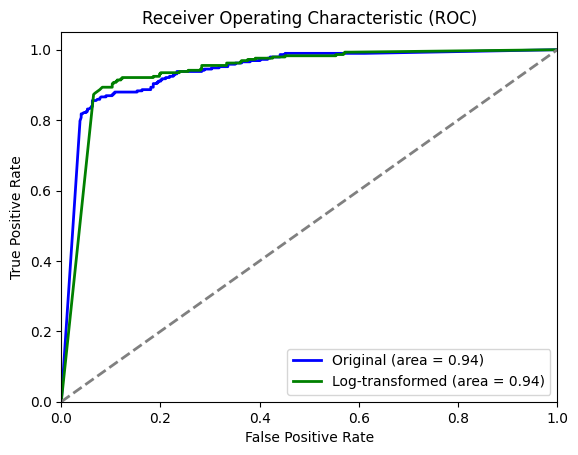

In [108]:
#2
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming y_val are the true labels for the validation set

# Get prediction probabilities for both models
y_prob_original = nb_original.predict_proba(X_val)[:, 1]
y_prob_log = nb_log.predict_proba(X_val_log)[:, 1]

# Compute ROC curve and ROC area for both models
fpr_original, tpr_original, _ = roc_curve(y_val, y_prob_original)
fpr_log, tpr_log, _ = roc_curve(y_val, y_prob_log)
roc_auc_original = auc(fpr_original, tpr_original)
roc_auc_log = auc(fpr_log, tpr_log)

# Plot ROC curve
plt.figure()
plt.plot(fpr_original, tpr_original, color='blue', lw=2, label=f'Original (area = {roc_auc_original:.2f})')
plt.plot(fpr_log, tpr_log, color='green', lw=2, label=f'Log-transformed (area = {roc_auc_log:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


In [114]:
#3
accuracy_nb = accuracy_val_original
accuracy_nb_log = accuracy_val_log
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_val)
accuracy_svm = accuracy_score(y_val, y_pred_svm)
print(f"Accuracy of Naive Bayes: {accuracy_nb:.4f}")
print(f"Accuracy of Naive Bayes (Log-transformed Data): {accuracy_nb_log:.4f}")
print(f"Accuracy of SVM: {accuracy_svm:.4f}")

# Compare the accuracies
if accuracy_nb > accuracy_svm:
    print("Naive Bayes (Original Data) has higher accuracy than SVM.")
elif accuracy_nb_log > accuracy_svm:
    print("Naive Bayes (Log-transformed Data) has higher accuracy than SVM.")
else:
    print("SVM has higher accuracy than both Naive Bayes models.")

Accuracy of Naive Bayes: 0.8217
Accuracy of Naive Bayes (Log-transformed Data): 0.8275
Accuracy of SVM: 0.6594
Naive Bayes (Original Data) has higher accuracy than SVM.
